<a href="https://colab.research.google.com/github/FrankPorto/frank_rep/blob/main/MVP2_b_Franklin_da_Silva_Porto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MVP II - PARTE b: REDE NEURAL CONVOLUCIONAL PARA RECONHECIMENTO DE IMAGENS

**PARTE b)**


**1.   *Introdução***

A parte b deste MVP, apresenta uma Rede Neural Convolucional, de aprendizado Supervisionado, do tipo Classificação.

**2.   *Definição do problema***

  2.1 *Qual é a descrição do problema?*

A proposta desta parte do MVP é, após o treino com um dataset de arquivos de imagens de gatos,  interpretar se uma imagem de um animal qualquer é ou não de um gato.

  2.2 *Você tem premissas ou hipóteses sobre o problema? Quais?*

Basicamente, trata-se de um projeto para identificação de imagens.

  2.3 *Que restrições ou condições foram impostas para selecionar os dados?*

Buscar imagens de referidos animais na Internet

  2.4 *Descreva o seu dataset (atributos, imagens, anotações, etc).*

O Dataset, trata-se de uma pasta com várias fotos de gatos para treino e fotos de animais para teste.


**3.   *Pré-processamento***

  3.1 *Definição dos atributos/colunas do Dataset*

Por se tratar exclusivamente de arquivos de imagens com o objetivo de identificação, o Dataset não possui atributos ou colunas.

**4.   *Análise dos Dados***

In [1]:
#Importação das bibliotecas
#Devido à rede ser Convolucional, utilizarei a Tensorflow e a Kerras
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

#Montando a Rede Neural CNN
modelo = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])


*4.1 Compilação do Modelo*

In [ ]:
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


*4.2 Pré-processar e gerar lotes de imagens*

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
  directory='https://github.com/FrankPorto/frank_rep/tree/main/Treino',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

teste_datagen = ImageDataGenerator(rescale=1./255)
teste_generator = validation_datagen.flow_from_directory(
    'https://github.com/FrankPorto/frank_rep/tree/main/Teste/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Treinar o Modelo

In [ ]:
history = modelo.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)
history

Epoch 1/10
10/10 [==============================] - 20s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 2/10
10/10 [==============================] - 18s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 18s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 18s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 24s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 19s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 18s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 20s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 18s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 18s 2s/step - loss: 0.0000e+0

dict_keys(['loss', 'accuracy'])


KeyError: ignored

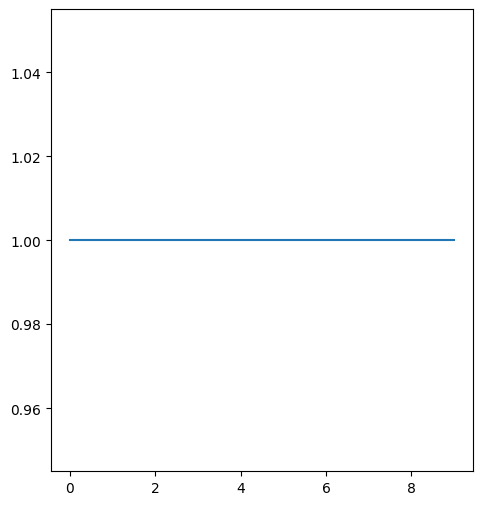

In [ ]:

print(history.history.keys())


# Plotar o desempenho do treinamento
plt.figure(figsize=(12, 6))

# Plotar a acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia (treinamento)')
plt.plot(history.history['val_accuracy'], label='Acurácia (validação)')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Plotar a perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda (treinamento)')
plt.plot(history.history['val_loss'], label='Perda (validação)')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Fazer previsão

def predict_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    prediction = modelo.predict(img_array)


    if prediction[0][0] > 0.5:
       return "É um gato!"
    else:
       return "Não é um gato."
